<a href="https://colab.research.google.com/github/akhil9900/Neural-home-assignment-3/blob/main/Home_assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.3848 - val_loss: 0.1903
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1810 - val_loss: 0.1546
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1505 - val_loss: 0.1350
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1333 - val_loss: 0.1228
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1217 - val_loss: 0.1141
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1136 - val_loss: 0.1077
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1077 - val_loss: 0.1033
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1036 - val_loss: 0.1001
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1005 - val_loss: 0.0981
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0989 - val_loss: 0.0965
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0975 - val_los

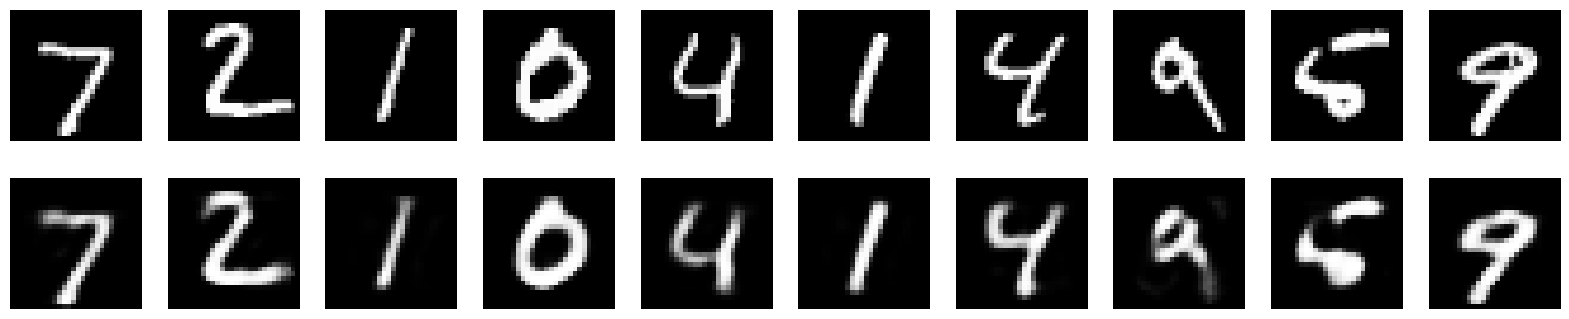

In [1]:
# Q1: Basic Autoencoder
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))

# Encoder
input_img = Input(shape=(784,))
encoded = Dense(32, activation='relu')(input_img)

# Decoder
decoded = Dense(784, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

# Train the model
autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Reconstruct images
reconstructed = autoencoder.predict(x_test)

# Plot original vs reconstructed
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1666 - val_loss: 0.1328
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1328 - val_loss: 0.1287
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.1293 - val_loss: 0.1268
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1277 - val_loss: 0.1257
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1262 - val_loss: 0.1250
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1258 - val_loss: 0.1245
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1252 - val_loss: 0.1243
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1248 - val_loss: 0.1240
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1245 - val_loss: 0.1238
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1245 - val_loss: 0.1237
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1245 - val_loss: 0.1238
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

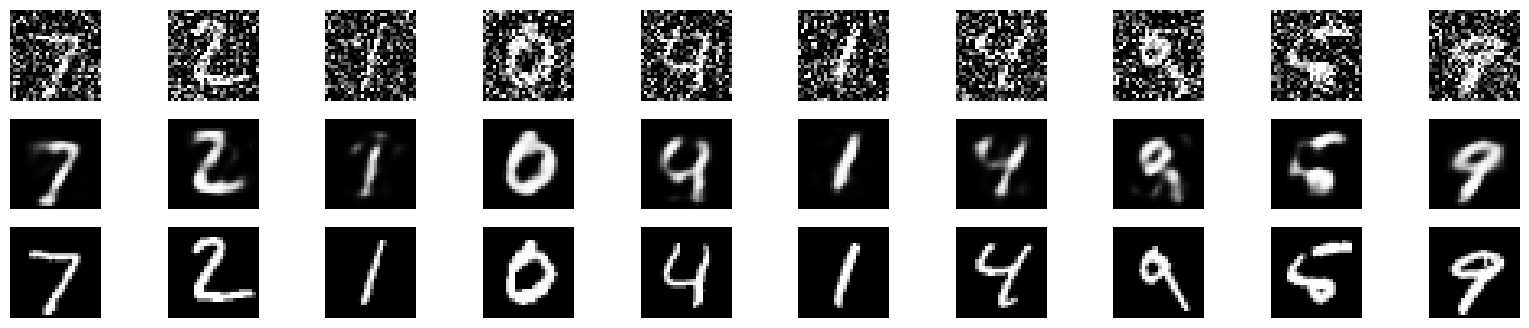

In [2]:
# Q2: Denoising Autoencoder
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(0, 1, x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(0, 1, x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Use same autoencoder structure
autoencoder.fit(x_train_noisy, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))

# Visualize denoising results
reconstructed = autoencoder.predict(x_test_noisy)

plt.figure(figsize=(20, 4))
for i in range(n):
    # Noisy
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    # Cleaned
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    # Original
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()


In [4]:
# Q3: LSTM Text Generation
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.utils import to_categorical

# Load a small text sample
text = open(tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')).read().lower()
chars = sorted(list(set(text)))
char_to_index = {c: i for i, c in enumerate(chars)}
index_to_char = {i: c for i, c in enumerate(chars)}

# Prepare input/output sequences
seq_length = 40
step = 3
sentences = []
next_chars = []

for i in range(0, len(text) - seq_length, step):
    sentences.append(text[i: i + seq_length])
    next_chars.append(text[i + seq_length])

X = np.zeros((len(sentences), seq_length, len(chars)), dtype=np.bool_)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool_)

for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_to_index[char]] = 1
    y[i, char_to_index[next_chars[i]]] = 1

# LSTM Model
model = Sequential([
    LSTM(128, input_shape=(seq_length, len(chars))),
    Dense(len(chars), activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(X, y, batch_size=128, epochs=10)

# Text generation
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds + 1e-6) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    return np.random.choice(len(preds), p=preds)

seed = "the king is dead and the "
generated = seed
for _ in range(200):
    x_pred = np.zeros((1, seq_length, len(chars)))
    for t, char in enumerate(seed):
        x_pred[0, t, char_to_index.get(char, 0)] = 1
    preds = model.predict(x_pred, verbose=0)[0]
    next_index = sample(preds, temperature=0.7)
    next_char = index_to_char[next_index]
    generated += next_char
    seed = seed[1:] + next_char

print("Generated text:\n", generated)


Epoch 1/10
2905/2905 ━━━━━━━━━━━━━━━━━━━━ 301s 103ms/step - loss: 2.5859
Epoch 2/10
2905/2905 ━━━━━━━━━━━━━━━━━━━━ 321s 103ms/step - loss: 1.9940
Epoch 3/10
2905/2905 ━━━━━━━━━━━━━━━━━━━━ 298s 103ms/step - loss: 1.8176
Epoch 4/10
2905/2905 ━━━━━━━━━━━━━━━━━━━━ 320s 102ms/step - loss: 1.7143
Epoch 5/10
2905/2905 ━━━━━━━━━━━━━━━━━━━━ 323s 103ms/step - loss: 1.6450
Epoch 6/10
2905/2905 ━━━━━━━━━━━━━━━━━━━━ 320s 102ms/step - loss: 1.5920
Epoch 7/10
2905/2905 ━━━━━━━━━━━━━━━━━━━━ 299s 103ms/step - loss: 1.5548
Epoch 8/10
2905/2905 ━━━━━━━━━━━━━━━━━━━━ 322s 103ms/step - loss: 1.5233
Epoch 9/10
2905/2905 ━━━━━━━━━━━━━━━━━━━━ 322s 103ms/step - loss: 1.4931
Epoch 10/10
2905/2905 ━━━━━━━━━━━━━━━━━━━━ 324s 103ms/step - loss: 1.4706
Generated text:
 the king is dead and the llse,teeaesussaeerearste?!sl,
,le,!a,,i,,tt!ss!se,!,
ls o'l,,a, eilyai!y',tl,i
em,leeosss!a!sy'r'!eess!
,,!,myall,,,
su,ses'ierlieeismillle,!!,.'.!,e,,e,,se!i,a'!slyeesl
las,!ea,lsels,,ey.,!iecs,
, el


In [5]:
# Q4: Sentiment Classification
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import classification_report, confusion_matrix

# Load data
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Padding
x_train = pad_sequences(x_train, maxlen=200)
x_test = pad_sequences(x_test, maxlen=200)

# LSTM model
model = Sequential([
    Embedding(vocab_size, 128),
    LSTM(64),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.2)

# Evaluate
y_pred = (model.predict(x_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 88s 274ms/step - accuracy: 0.7063 - loss: 0.5373 - val_accuracy: 0.8636 - val_loss: 0.3334
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 89s 283ms/step - accuracy: 0.9094 - loss: 0.2373 - val_accuracy: 0.8710 - val_loss: 0.3168
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 84s 268ms/step - accuracy: 0.9367 - loss: 0.1701 - val_accuracy: 0.8652 - val_loss: 0.3389
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step
[[10940  1560]
 [ 1762 10738]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87     12500
           1       0.87      0.86      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000

